In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import timedelta
from weather_data_reader import WeatherDataReader

In [2]:
reader = WeatherDataReader(
    bucket=os.getenv('AWS_BUCKET_NAME', 'manoa-raspi-weather'),
    bronze_prefix="samples",
    silver_prefix="silver",
    region="us-west-2"
)

In [5]:
df = reader.get_readings(hours=24*7, layer="silver")

/home/jovyan/work/weather_data_reader.py:221: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat(all_data, ignore_index=True)


In [7]:
df

,ts,temp_c,temp_f,humidity,pressure,temp_from_humidity,temp_from_pressure,cpu_temp,dew_point_c,dew_point_f,comfort_index,pressure_trend_3h,pressure_trend_6h,pressure_trend_label,daily_temp_min,daily_temp_max,daily_temp_avg,daily_humidity_avg,daily_pressure_avg,timestamp
0,2025-10-10T21:34:45.080695Z,29.10,84.37,54.78,1016.29,38.01,35.30,49.66,19.06,66.30,too_hot,NaN,NaN,calculating,NaN,NaN,NaN,NaN,NaN,2025-10-10 21:34:45.080695+00:00
1,2025-10-10T21:49:56.352157Z,29.37,84.86,54.75,1016.04,38.18,35.57,48.20,19.30,66.74,too_hot,NaN,NaN,calculating,NaN,NaN,NaN,NaN,NaN,2025-10-10 21:49:56.352157+00:00
2,2025-10-10T22:05:07.604259Z,29.64,85.36,53.86,1015.86,38.39,35.84,48.20,19.28,66.71,too_hot,NaN,NaN,calculating,NaN,NaN,NaN,NaN,NaN,2025-10-10 22:05:07.604259+00:00
3,2025-10-10T22:20:19.008979Z,29.77,85.59,51.22,1015.67,38.67,35.97,48.69,18.60,65.48,too_hot,NaN,NaN,calculating,NaN,NaN,NaN,NaN,NaN,2025-10-10 22:20:19.008979+00:00
4,2025-10-10T22:35:30.688805Z,29.09,84.37,54.84,1015.56,37.88,35.29,45.76,19.07,66.32,too_hot,NaN,NaN,calculating,NaN,NaN,NaN,NaN,NaN,2025-10-10 22:35:30.688805+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,2025-10-17T20:18:23.024828Z,28.49,83.28,50.93,1016.41,37.52,34.69,44.30,17.33,63.20,too_hot,NaN,NaN,calculating,NaN,NaN,NaN,NaN,NaN,2025-10-17 20:18:23.024828+00:00
631,2025-10-17T20:33:33.959730Z,28.85,83.92,50.74,1016.32,37.77,35.05,44.30,17.60,63.69,too_hot,NaN,NaN,calculating,NaN,NaN,NaN,NaN,NaN,2025-10-17 20:33:33.959730+00:00
632,2025-10-17T20:48:47.189128Z,29.02,84.23,50.53,1016.13,38.07,35.22,44.30,17.69,63.85,too_hot,NaN,NaN,calculating,NaN,NaN,NaN,NaN,NaN,2025-10-17 20:48:47.189128+00:00
633,2025-10-17T21:03:58.564760Z,29.18,84.52,50.14,1016.19,38.18,35.38,44.79,17.72,63.89,too_hot,NaN,NaN,calculating,NaN,NaN,NaN,NaN,NaN,2025-10-17 21:03:58.564760+00:00


In [11]:
df['ts'] = pd.to_datetime(df['ts'])
df.set_index('ts', inplace=True)

In [28]:
df.describe()

,temp_c,temp_f,humidity,pressure,temp_from_humidity,temp_from_pressure,cpu_temp,dew_point_c,dew_point_f,pressure_trend_3h,pressure_trend_6h,daily_temp_min,daily_temp_max,daily_temp_avg,daily_humidity_avg,daily_pressure_avg,unix_ts,day_of_week
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,25.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,6.350000e+02,635.000000
mean,30.359417,86.646961,47.811795,1013.349291,39.570772,36.781024,50.883433,17.993606,64.388362,-40.683600,-37.845185,71.407407,90.014815,86.455556,47.900000,1013.366667,1.760441e+09,2.855118
std,2.004131,3.607569,3.315608,40.298439,1.588066,2.132235,6.791740,1.435003,2.583193,202.485003,195.067253,21.866464,0.789208,1.563855,2.261892,4.519530,1.753028e+05,1.937783
min,-6.240000,20.760000,41.330000,0.000000,33.880000,0.000000,42.350000,-13.230000,8.180000,-1012.600000,-1013.860000,20.800000,89.200000,83.900000,44.500000,1002.700000,1.760132e+09,0.000000
25%,29.385000,84.885000,45.200000,1014.000000,38.380000,35.605000,44.300000,17.500000,63.505000,-0.780000,-1.970000,71.300000,89.250000,85.500000,46.500000,1014.300000,1.760303e+09,1.000000
50%,30.600000,87.080000,47.050000,1015.110000,39.680000,36.960000,48.690000,18.050000,64.490000,-0.080000,-1.060000,82.100000,90.100000,86.400000,48.200000,1015.100000,1.760447e+09,3.000000
75%,31.465000,88.640000,50.190000,1015.940000,40.900000,38.110000,59.400000,18.460000,65.225000,0.430000,1.775000,82.400000,90.300000,88.300000,48.300000,1015.450000,1.760591e+09,5.000000
max,33.080000,91.540000,57.830000,1017.770000,42.760000,40.050000,63.300000,20.220000,68.400000,1.460000,2.540000,83.200000,91.500000,88.600000,52.400000,1016.300000,1.760736e+09,6.000000


In [29]:
df[df['temp_f']< 40]

,temp_c,temp_f,humidity,pressure,temp_from_humidity,temp_from_pressure,cpu_temp,dew_point_c,dew_point_f,comfort_index,...,pressure_trend_6h,pressure_trend_label,daily_temp_min,daily_temp_max,daily_temp_avg,daily_humidity_avg,daily_pressure_avg,timestamp,unix_ts,day_of_week
ts,,,,,,,,,,,,,,,,,,,,,
2025-10-14 02:01:42.544923+00:00,-6.24,20.76,57.56,0.0,33.88,0.0,50.63,-13.23,8.18,too_cold,...,-1013.86,rapidly_falling,NaN,NaN,NaN,NaN,NaN,2025-10-14 02:01:42.544923+00:00,1.760407e+09,1


In [30]:
df = df[df['temp_f']> 40].copy()

<Axes: xlabel='ts'>

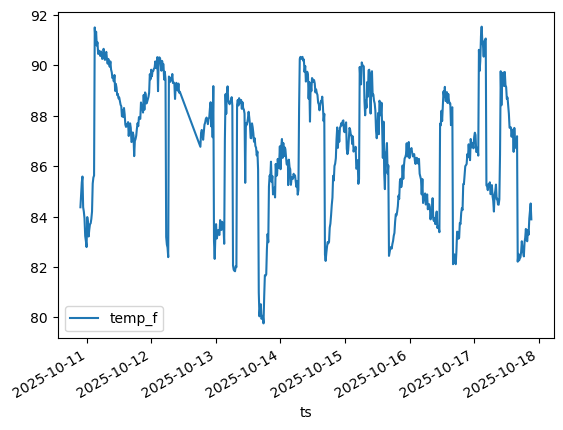

In [31]:
df[['temp_f']].plot()

In [32]:
df['unix_ts'] = df.index.astype(np.int64) / 10**9 

In [33]:
line_coef = np.polyfit(df['unix_ts'],df['temp_f'],3)
print(line_coef)

polynomial = np.poly1d(line_coef)

[ 1.21739868e-21 -2.14400106e-12 -3.77365478e-03  6.64599429e+06]


/tmp/ipykernel_140/722385574.py:1: RankWarning: Polyfit may be poorly conditioned
  line_coef = np.polyfit(df['unix_ts'],df['temp_f'],3)


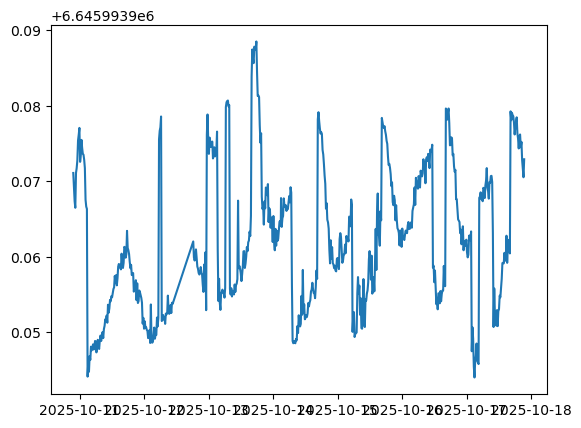

In [34]:
plt.plot(df.index, polynomial(df.temp_f))

In [35]:
df['day_of_week'] = df.index.day_of_week

<Axes: xlabel='day_of_week', ylabel='temp_f'>

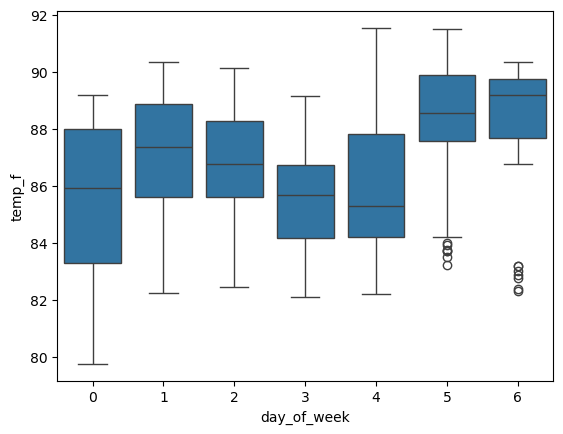

In [36]:
sns.boxplot(data=df, x='day_of_week', y='temp_f')

In [37]:
df['temp_f'].resample('d').mean()

ts
2025-10-10 00:00:00+00:00    84.173000
2025-10-11 00:00:00+00:00    88.378526
2025-10-12 00:00:00+00:00    88.309538
2025-10-13 00:00:00+00:00    85.429263
2025-10-14 00:00:00+00:00    87.091474
2025-10-15 00:00:00+00:00    86.769895
2025-10-16 00:00:00+00:00    85.635638
2025-10-17 00:00:00+00:00    86.351647
Freq: D, Name: temp_f, dtype: float64

In [38]:
df['temp_f'].resample('d').median()

ts
2025-10-10 00:00:00+00:00    84.285
2025-10-11 00:00:00+00:00    88.550
2025-10-12 00:00:00+00:00    89.180
2025-10-13 00:00:00+00:00    85.930
2025-10-14 00:00:00+00:00    87.350
2025-10-15 00:00:00+00:00    86.770
2025-10-16 00:00:00+00:00    85.665
2025-10-17 00:00:00+00:00    86.470
Freq: D, Name: temp_f, dtype: float64

In [39]:
df['temp_from_humidity'].resample('d').mean()

ts
2025-10-10 00:00:00+00:00    37.801000
2025-10-11 00:00:00+00:00    40.899158
2025-10-12 00:00:00+00:00    40.775077
2025-10-13 00:00:00+00:00    39.028211
2025-10-14 00:00:00+00:00    39.567789
2025-10-15 00:00:00+00:00    39.387895
2025-10-16 00:00:00+00:00    38.724574
2025-10-17 00:00:00+00:00    39.190235
Freq: D, Name: temp_from_humidity, dtype: float64